In [3]:
from pathlib import Path

import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams
import pathlib as path


In [5]:
P=path.PureWindowsPath(r"D:\Users\79864\Desktop\毕业论文——BTK\数据预处理\03input\筛选总表04_qsar.csv")
egfr_data=pd.read_csv(P)

In [ ]:
# # initialize filter
# params = FilterCatalogParams()
# params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
# catalog = FilterCatalog(params)
# # search for PAINS
# matches = []
# matches_index=[]
# clean = []
# for index, row in tqdm(egfr_data.iterrows(), total=egfr_data.shape[0]):
#     molecule = Chem.MolFromSmiles(row.SMILES)
#     entry = catalog.GetFirstMatch(molecule)  # Get the first matching PAINS
#     if entry is not None:
#         # store PAINS information
#         matches.append(
#             {

#                 "rdkit_molecule": molecule,
#                 "pains": entry.GetDescription().capitalize(),
#             }
#         )
#         matches_index.append(index)
#     else:
#         # collect indices of molecules without PAINS
#         clean.append(index)

# matches = pd.DataFrame(matches)
# egfr_data_pains = egfr_data.loc[clean]  # keep molecules without PAINS
# substructure_data = egfr_data.loc[matches_index]
# print(f"Number of compounds with PAINS: {len(matches)}")
# print(f"Number of compounds without PAINS: {len(egfr_data_pains)}")
# substructure_data.to_csv(P.parents[0].joinpath(P.stem+"含pains.csv"),index=None,columns=["SMILES","active"])

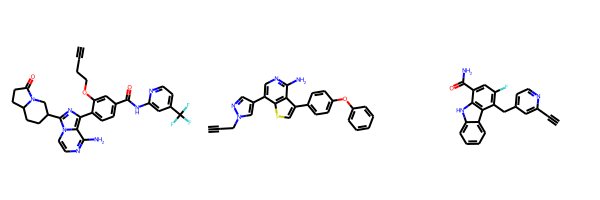

In [ ]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(egfr_data, smilesCol="SMILES")
# Draw first 3 molecules
Chem.Draw.MolsToGridImage(
    list(egfr_data.head(3).ROMol),
    
)

In [ ]:
# substructures=["[!#6;!#1]~*(~[!#6;!#1])~[!#6;!#1]","C#C-[CX3]=[OX1-0]","C(#C-[CX3]=[OX1-0])-[CD1H3]",
# "A-S(-[CD2H1]=[CD1H2])=[OX1-0]","[S;H1]","[C,O]-1-[C,O]-[CD3H1]1-[CD3H0](-[CX4])=[OX1-0]",
# "[CD2H2](-[CX3]=[OX1-0])-[F,Cl,Br,I]"]

# substructures=pd.DataFrame(substructures,columns=['smarts'])
# substructures["rdkit_molecule"] = substructures.smarts.apply(Chem.MolFromSmarts)
# m = substructures.smarts.apply(Chem.MolFromSmarts)
# m.apply(lambda x: x.UpdatePropertyCache(strict=False))

In [ ]:
# Chem.Draw.MolsToGridImage(
#     mols=m.tolist()[0:7],

# )

In [6]:
substructures=["[CX3]=[CX3]-[CX3]=[OX1-0]","C#C-[CX3]=[OX1-0]","C(#C-[CX3]=[OX1-0])-[CD1H3]",
"A-S(-[CD2H1]=[CD1H2])=[OX1-0]","[S;H1]","[C,O]-1-[C,O]-[CD3H1]1-[CD3H0](-[CX4])=[OX1-0]",
"[CD2H2](-[CX3]=[OX1-0])-[F,Cl,Br,I]"]

l = list(map(lambda x: Chem.MolFromSmarts(x), substructures))
# substructures["rdkit_molecule"] = list(map(lambda x: Chem.MolFromSmarts(x), substructures))

In [7]:
# search for unwanted substructure
matches = []
matches_index=[]
clean = []
for index, row in tqdm(egfr_data.iterrows(), total=egfr_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.SMILES)
    match = False
    for substructure in l:
        if molecule.HasSubstructMatch(substructure):
            matches.append(
                {

                    "rdkit_molecule": molecule,
                    "substructure": substructures,

                }
            )
            matches_index.append(index)
            match = True
    if not match:
        clean.append(index)

matches = pd.DataFrame(matches)
substructure_data = egfr_data.loc[matches_index]
NOT_matches_data = egfr_data.loc[clean]

100%|██████████| 3546/3546 [00:01<00:00, 2544.92it/s]


In [8]:
# NBVAL_CHECK_OUTPUT
print(f"Number of found unwanted substructure: {len(substructure_data)}")
print(f"Number of compounds without unwanted substructure: {len(NOT_matches_data)}")

Number of found unwanted substructure: 1635
Number of compounds without unwanted substructure: 1988


In [9]:
NOT_matches_data.to_csv(P.parents[0].joinpath(P.stem+"不含子结构.csv"),index=None,columns=["SMILES","active","测活方法","Links","Structure: Image"])
#NOT_matches_data.to_csv(P.parents[0].joinpath(P.stem+"不含子结构.csv"),index=None,columns=["SMILES"])

In [10]:
substructure_data.to_csv(P.parents[0].joinpath(P.stem+"含子结构.csv"),index=None,columns=["SMILES","active","测活方法","Links"])
# substructure_data.to_csv(P.parents[0].joinpath(P.stem+"含子结构.csv"),index=None,columns=["SMILES"])

In [ ]:
# smiles=mol.apply(lambda x : Chem.MolToSmiles(x))